# Using Matplotlib and scikit-learn to Generate a Map of Common Crime Areas in LA
For more information / tutorial see the blogpost: https://blog.jhmejia.com/2022/12/using-matplotlib-and-scikit-learn-to.html

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [62]:
# Read in the data from the CSV file
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# You can find the data here: https://catalog.data.gov/dataset/crime-data-from-2020-to-present
# You can also download the data directly from the API with this command:
# df = pd.read_csv('https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD')


# Verify that the data was read in correctly
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


Pre-processing time 

In [63]:
# Remove all data where the 'Lat' or 'Lon' is 0
df = df[(df['LAT'] != 0) & (df['LON'] != 0)]

# Verify that the data was read in correctly
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


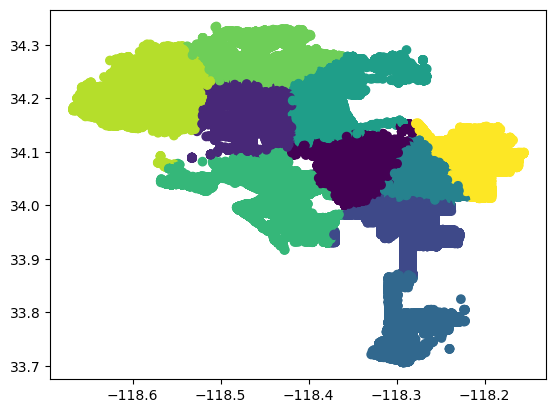

In [64]:
# Do a KMeans clustering on the data
kmeans = KMeans(n_clusters=10, random_state=0).fit(df[['LAT', 'LON']])
df['cluster'] = kmeans.labels_


plt.scatter(df['LON'], df['LAT'], c=df['cluster'])
plt.show()

Now we are going to do the same thing but display it on a map with geopandas! Geopandas is an extremely useful tool which you can use to add geographic support to pandas objects. It also works on shapely. 

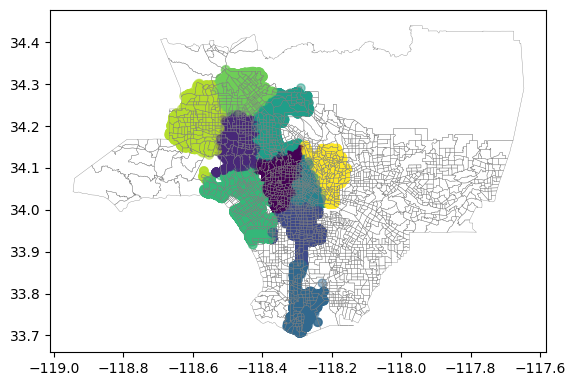

<Figure size 10000x10000 with 0 Axes>

In [70]:
import geopandas

# Read in the Census Tracts data from the shapefile, found here: https://geohub.lacity.org/datasets/lacounty::census-tracts-2020/explore
county = geopandas.read_file('Census_Tracts_2020.shx')

# Verify that the data was read in correctly
county.head()

#Remove the data that have CT20 == 599100 or 599000 (these are in the ocean)
county = county[county['CT20'] != '599100']
county = county[county['CT20'] != '599000']

#Remove the data whose geometry has a point with latitude of 34.4 or higher (this are outside of LA City)

county = county[county['geometry'].apply(lambda x: x.centroid.y < 34.4)]


# Plot the county map on same plot
county.xlabel = "lon"
county.ylabel = "lat"

county.boundary.plot(color="Gray", linewidth=.25)



# Plot the clusters on the county map
plt.scatter(df['LON'], df['LAT'], c=df['cluster'], alpha=0.5)
plt.figure(figsize=(100,100))
plt.show()


## Finding conclusions based on this data

In [66]:
# Find the most common crime in each cluster
df.groupby('cluster')['Crm Cd Desc'].agg(pd.Series.mode)




cluster
0    VEHICLE - STOLEN
1    VEHICLE - STOLEN
2    VEHICLE - STOLEN
3    VEHICLE - STOLEN
4    VEHICLE - STOLEN
5    VEHICLE - STOLEN
6            BURGLARY
7    VEHICLE - STOLEN
8    VEHICLE - STOLEN
9    VEHICLE - STOLEN
Name: Crm Cd Desc, dtype: object

In [67]:
# Find the average location of crimes in each cluster

df.groupby('cluster')[['LAT', 'LON']].mean()

# Print the number of crimes in each cluster, the most common crime, and the average location of crimes in each cluster

for i in range(10):
    print("Cluster ", i)
    print("Number of crimes: ", len(df[df['cluster'] == i]))
    print("Most common crime: ", df[df['cluster'] == i]['Crm Cd Desc'].mode()[0])
    print("Average location: ", df[df['cluster'] == i][['LAT', 'LON']].mean())
    print()

# Interestingly, Cluster 6 has a different most common crime than the other clusters. Cluster 6 is around Mar Vista, which is a very wealthy neighborhood. 
# The most common crime in Cluster 6 is "Burglary Residential" which is an uncommon crime in the other clusters. 
# This is possibly because the other clusters are in poorer neighborhoods, where the most common crime is "Vehicle - Stolen".


Cluster  0
Number of crimes:  63357
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.070689
LON   -118.336828
dtype: float64

Cluster  1
Number of crimes:  29198
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.185348
LON   -118.461945
dtype: float64

Cluster  2
Number of crimes:  61991
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     33.969310
LON   -118.283347
dtype: float64

Cluster  3
Number of crimes:  17594
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     33.772144
LON   -118.285207
dtype: float64

Cluster  4
Number of crimes:  75388
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.049535
LON   -118.270168
dtype: float64

Cluster  5
Number of crimes:  28953
Most common crime:  VEHICLE - STOLEN
Average location:  LAT     34.188358
LON   -118.375390
dtype: float64

Cluster  6
Number of crimes:  39964
Most common crime:  BURGLARY
Average location:  LAT     34.010625
LON   -118.435924
dtype: float64



This is a proposed LA City council district map. Our clusters are different than these, but you can see how they were clustered similarly to the map. 
You can see that just by clustering crime we were able to find important information about LA city that is similar to what the official city council made. 
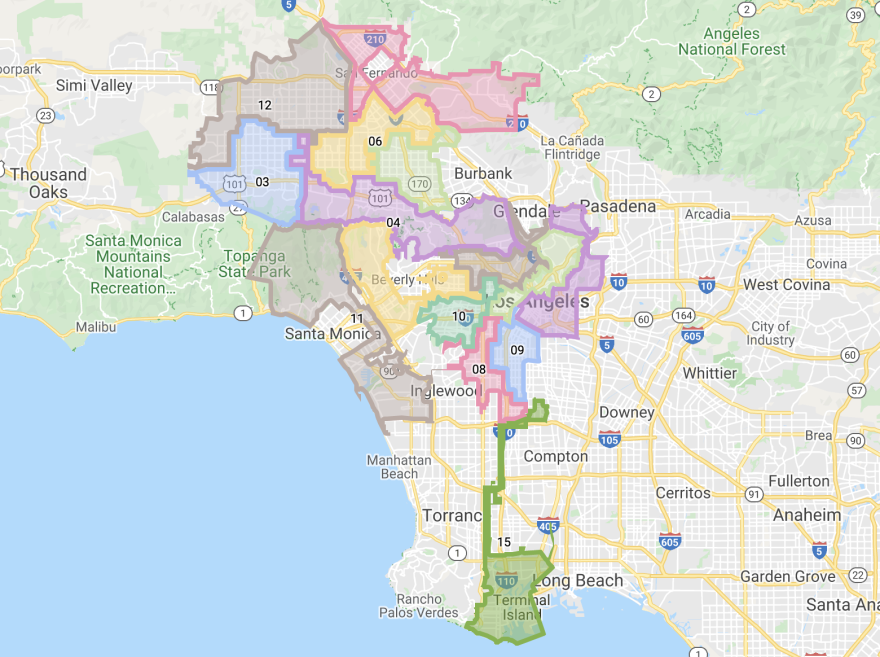

As you can see, we have drawn some great conclusions from the data. I hope this serves as a good jumping off point for you to make your own clustering algorithms and serves as a good intro to pandas, geopandas, matplotlib, scikit-learn, and more. 